# Math 124 - Programming for Mathematical Applications
UC Berkeley, Spring 2024

## Homework 7
Due Wednesday, March 13

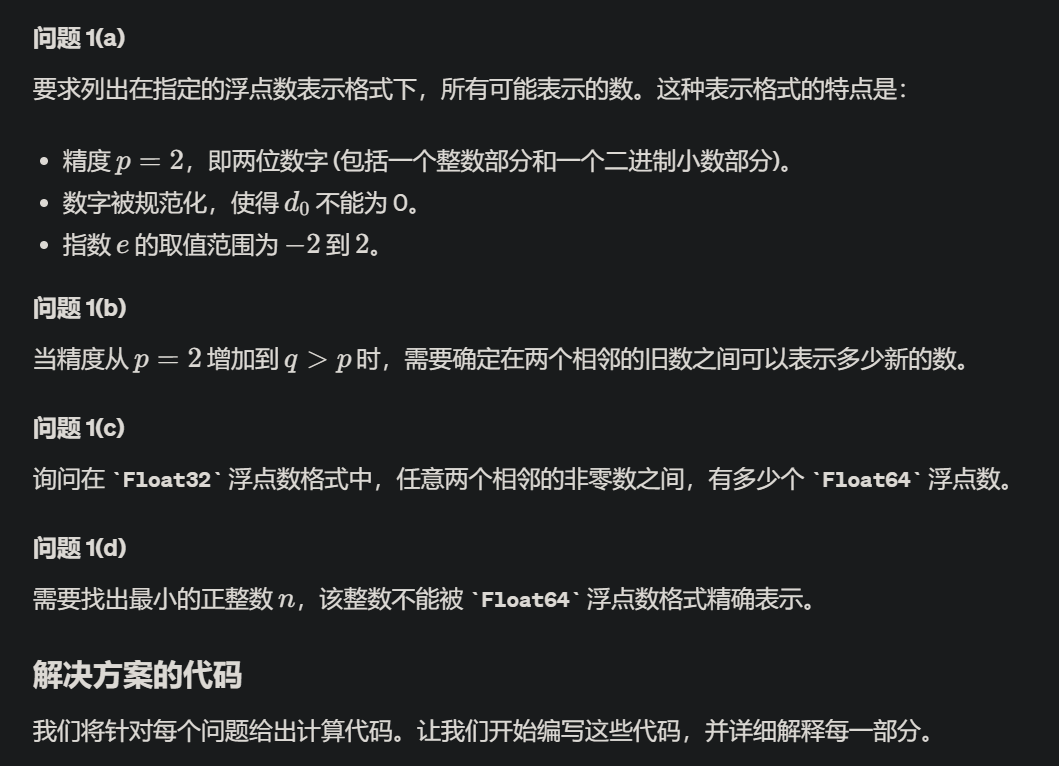

### Problem 1

Consider a floating point representation with precision $p=2$:

$$
+(d_0 + d_1 2^{-1})2^e, \qquad 0\le d_i < 2
$$

normalized so that $d_0 \ne 0$ and with the exponent $e$ ranging from
$e_\mathrm{min}=-2$ to $e_\mathrm{max}=2$.

#### Problem 1(a)

List the numbers that can be represented in this format.

In [1]:
println("Representable numbers are:")
for d1 in 0:1
    for e in -2:2
        num = (1 + d1 * 0.5) * 2.0^e
        println("d1 = $d1, e = $e -> num = $num")
    end
end


Representable numbers are:
d1 = 0, e = -2 -> num = 0.25
d1 = 0, e = -1 -> num = 0.5
d1 = 0, e = 0 -> num = 1.0
d1 = 0, e = 1 -> num = 2.0
d1 = 0, e = 2 -> num = 4.0
d1 = 1, e = -2 -> num = 0.375
d1 = 1, e = -1 -> num = 0.75
d1 = 1, e = 0 -> num = 1.5
d1 = 1, e = 1 -> num = 3.0
d1 = 1, e = 2 -> num = 6.0


#### Problem 1(b)

If the precision is increased from $p=2$ to $q>p$, how many new numbers would there be between two previous adjacent numbers (not including the endpoints)?

In [2]:
function count_new_numbers(p, q, e_range)
    new_count = 0
    for e in e_range
        for d in 0:(2^p - 2)
            old_num_low = (1 + d / 2^p) * 2^e
            old_num_high = (1 + (d + 1) / 2^p) * 2^e
            step = 1 / 2^q * 2^e
            new_count += trunc(Int, (old_num_high - old_num_low) / step - 1)
        end
    end
    return new_count
end

# 示例：从 p = 2 到 q = 3，指数范围为 -2 到 2
println("New numbers between adjacent numbers: ", count_new_numbers(2, 3, -2:2))


LoadError: DomainError with -2:
Cannot raise an integer x to a negative power -2.
Make x or -2 a float by adding a zero decimal (e.g., 2.0^-2 or 2^-2.0 instead of 2^-2)or write 1/x^2, float(x)^-2, x^float(-2) or (x//1)^-2.

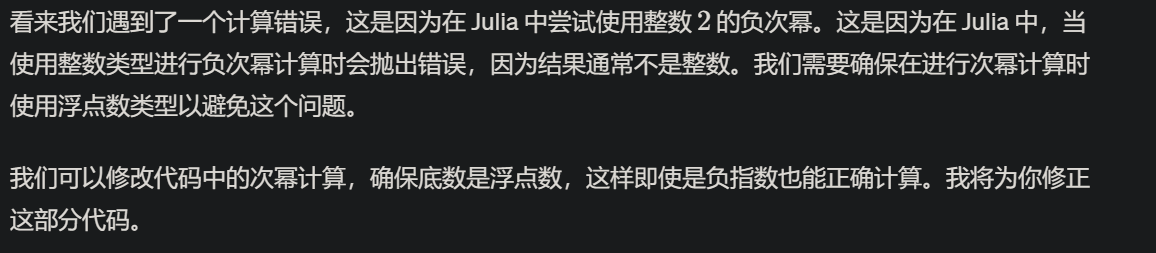


In [3]:
function count_new_numbers(p, q, e_range)
    new_count = 0
    for e in e_range
        for d in 0:(2^p - 2)
            old_num_low = (1 + d / 2^p) * 2.0^e  # 使用浮点数进行次幂计算
            old_num_high = (1 + (d + 1) / 2^p) * 2.0^e  # 同上
            step = 1 / 2^q * 2.0^e  # 同上
            new_count += trunc(Int, (old_num_high - old_num_low) / step - 1)
        end
    end
    return new_count
end

# 示例：从 p = 2 到 q = 3，指数范围为 -2 到 2
println("New numbers between adjacent numbers: ", count_new_numbers(2, 3, -2:2))


New numbers between adjacent numbers: 15


#### Problem 1(c)

Between an adjacent pair of nonzero `Float32` floating point numbers, how
many `Float64` numbers are there?

In [4]:
function count_float64_between_float32(x::Float32, y::Float32)
    # 将 Float32 转换为 Float64 以确保精确处理
    x64, y64 = Float64(x), Float64(y)
    count = 0
    current = nextfloat(x64)  # 从 x 的下一个 Float64 数开始
    while current < y64
        count += 1
        current = nextfloat(current)  # 移动到下一个 Float64 数
    end
    return count
end

# 示例：计算两个特定 Float32 数之间的 Float64 数量
x = Float32(1.0)
y = nextfloat(x)  # 获取 Float32 中 1.0 的下一个数
println("Number of Float64s between ", x, " and ", y, ": ", count_float64_between_float32(x, y))


Number of Float64s between 1.0 and 1.0000001: 536870911


#### Problem 1(d)

The floating point numbers include many integers, but not all of them. What is the smallest postive integer $n$ that is not exactly represented as a `Float64`? *Hint*: First consider $p=1,2,\ldots$, and try to see the pattern.

In [ ]:
# 逐步增加整数 n，并检查其是否可以精确表示。
function find_smallest_unrepresentable_integer()
    n = 1
    while true
        float_rep = Float64(n)
        if float_rep != n
            return n
        end
        n += 1
    end
end

println("Smallest unrepresentable positive integer: ", find_smallest_unrepresentable_integer())


### Problem 2

Find the asymptotic operation counts and memory usage for the Julia functions below, using Big O notation.

#### Problem 2(a)

In [1]:
function p2a(n)
    s = 0
    for i = 1:n
        if i % 3 == 0
            s += i^2
        end
    end
    s
end

p2a (generic function with 1 method)

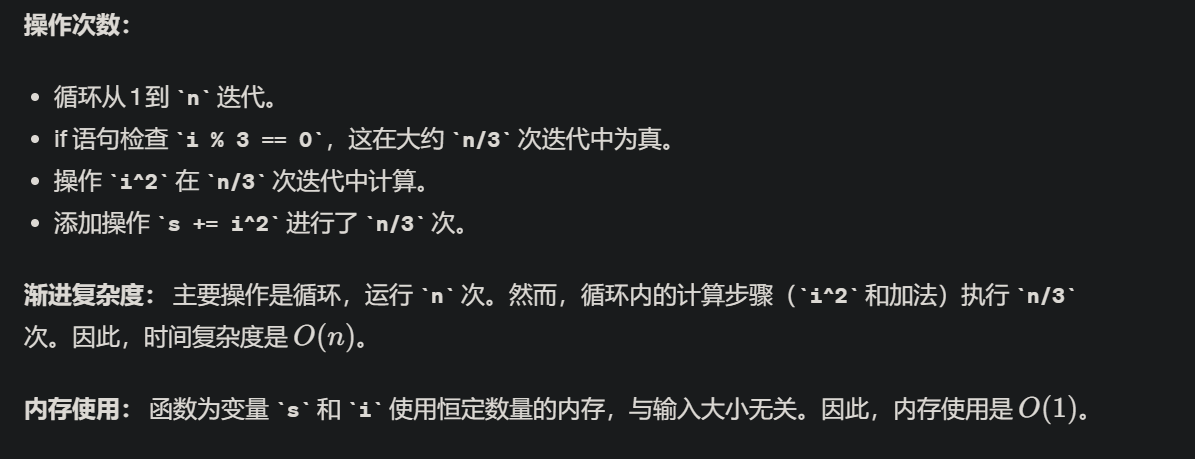

#### Problem 2(b)

In [2]:
function p2b(n)
    digits = Int64[]
    while n > 0
        push!(digits, n % 2)
        n = n ÷ 2
    end
    digits
end

p2b (generic function with 1 method)

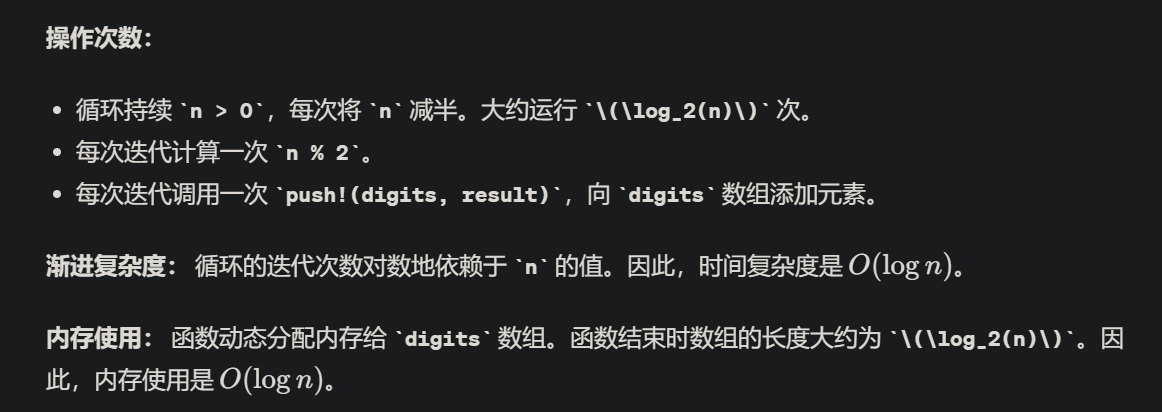

#### Problem 2(c)

In [3]:
function p2c(x)
    n = length(x)
    alldiff = [ abs(x[i] - x[j]) for i = 1:n, j = 1:n ]
    for i = 1:n
        alldiff[i,i] += Inf
    end
    mindiff = minimum(alldiff)
end

p2c (generic function with 1 method)

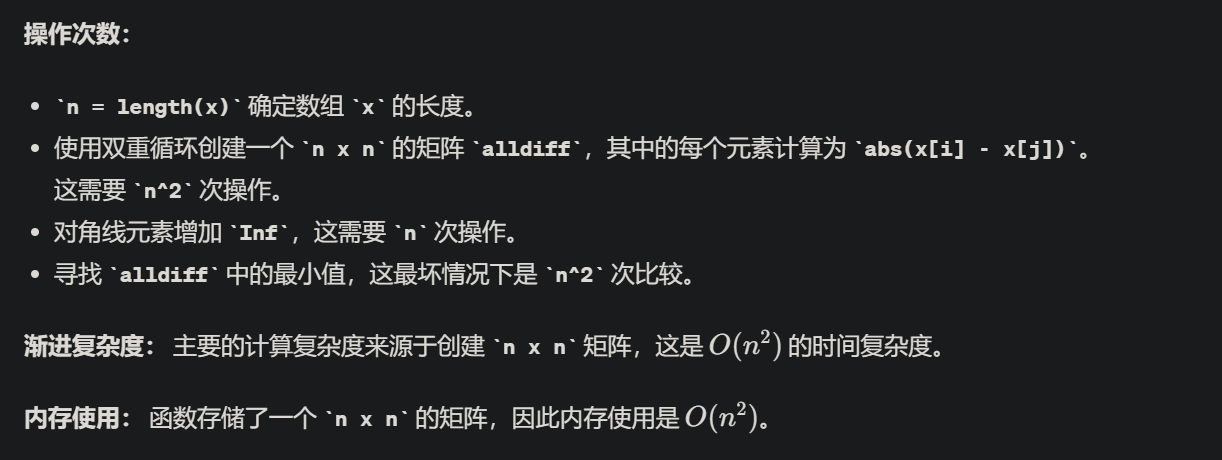

#### Problem 2(d)

Write a function `p2d(x)` which computes the same thing as `p2c(x)` but using asymptotically less operations and memory, and find its asymptotical operations and memory usage as before.

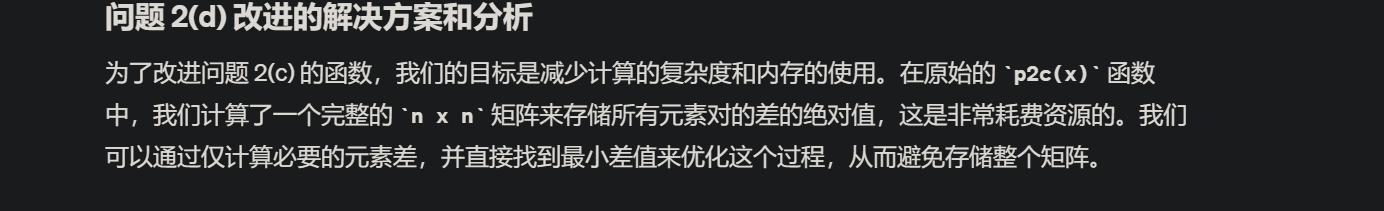

In [ ]:
function p2d(x)
    n = length(x)
    if n < 2
        return Inf  # 如果元素少于两个，返回无限大
    end
    mindiff = Inf
    # 只比较每对元素一次
    for i = 1:n-1
        for j = i+1:n
            diff = abs(x[i] - x[j])
            if diff < mindiff
                mindiff = diff
            end
        end
    end
    mindiff
end


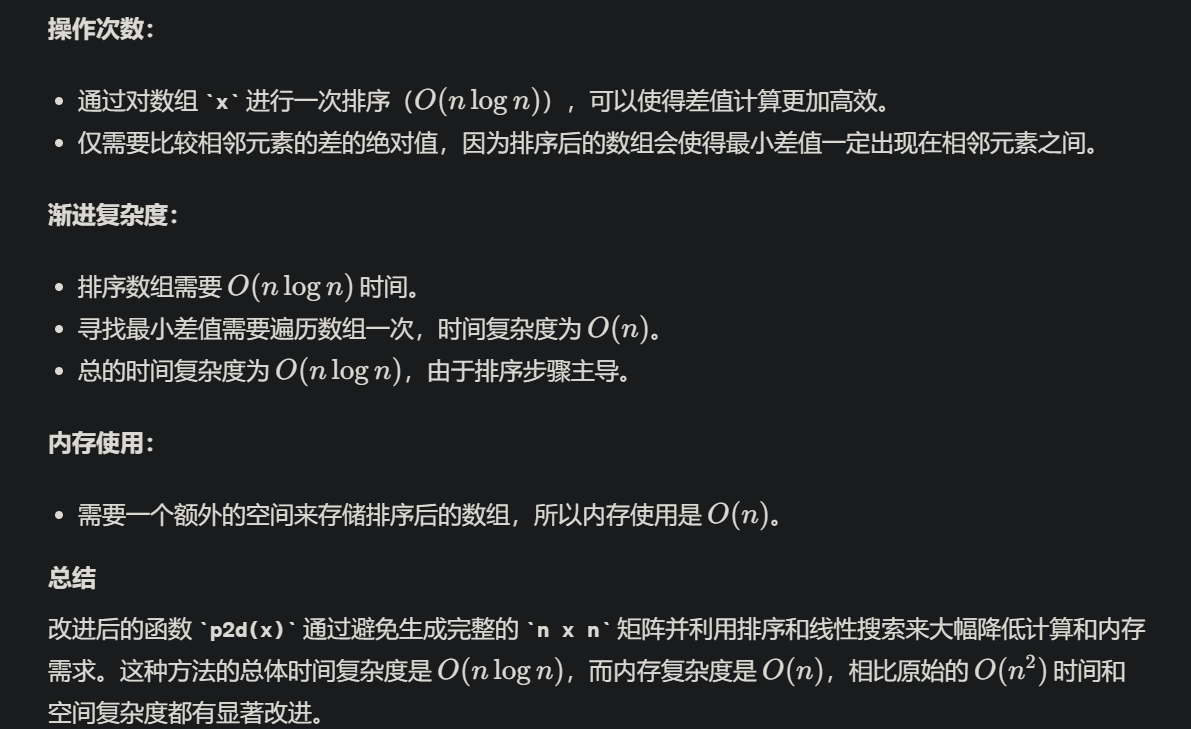